In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('C:/Users/Admin/Desktop/Python_koda')
from scipy.optimize import curve_fit
import sympy as sym
import scipy as sc
#import pandas as pd
import numpy.random as rndm
import time
#from time import time.time #as Time
print(time.time())

import scienceplots
plt.style.use(['science','notebook','grid'])

import numpy.random as rndm
from numpy.random import random as RND
from numpy.random import uniform as UNFM
from numpy.random import randint 

1733237717.004024


In [4]:
   # popravek : Periodic Boundary Conditions!!
def NeighboursSum(matrix, i, j):
    # Get the dimensions of the matrix
    rows, cols = matrix.shape
    
    # Initialize the sum
    total_sum = 0
    
    # Check the neighbors of the element at position (i, j)
    # Use modulo operator to handle periodic boundary conditions
    total_sum += matrix[(i - 1) % rows, j]  # Left neighbor
    total_sum += matrix[(i + 1) % rows, j]  # Right neighbor
    total_sum += matrix[i, (j - 1) % cols]  # Upper neighbor
    total_sum += matrix[i, (j + 1) % cols]  # Lower neighbor
    
    return total_sum

In [5]:
def IsingPlot(F):
    plt.imshow(F,cmap='binary')
    plt.axis('off')

čas simulacije (N=2.0e+05) : 3.382 s


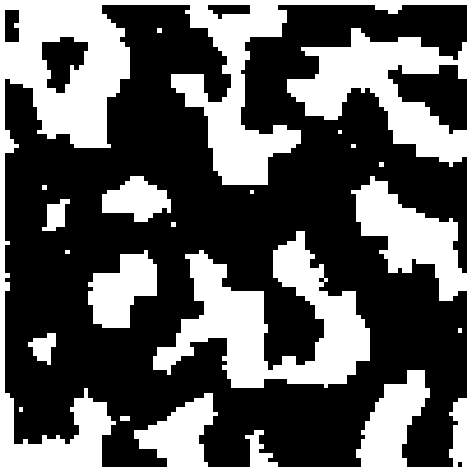

In [6]:
# https://predmeti.fmf.uni-lj.si/modelska/letnik21-22?action=AttachFile&do=get&target=MA1-19.nov.2020.pdf
#https://en.wikipedia.org/wiki/Ising_model#Two_dimensions
    
def Ising(a=10,N_potez=10**4,T=1,J=1,H=0,SEED = None):
    # temeperatura T: je normirana na Tc; T==T/Tc; enako jakost mag polja: H==H/J
    rndm.seed(SEED)
    Feromagnet_init = rndm.choice([-1,1],size=(a,a))  # začetno stanje
    FeromagnetSimulation = np.copy(Feromagnet_init)  # ta gre v simulacijo
    #print(Feromagnet)
    for i in range(N_potez):
        x,y = randint(0,a), randint(0,a)
        S = FeromagnetSimulation[x][y]
        #print(f'----NEW:{x,y}-->{S}----')
        dE = J * S * (NeighboursSum(FeromagnetSimulation,x,y) + H)
        #print(dE)
        if UNFM() < np.exp(- dE / T):
            #print(f'dE= {dE}- ok ----')
            FeromagnetSimulation[x][y] = - S
    return Feromagnet_init, FeromagnetSimulation



T_ising = time.time()
N_potez = 2*10**5
Fi,Ff = Ising(100,N_potez,T=0.6,H=0.04,SEED=15367)
print(f'čas simulacije (N={N_potez:.1e}) : {np.round(time.time()- T_ising,3)} s')

IsingPlot(Ff)